In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
import numpy as np

In [2]:
G = nx.karate_club_graph()

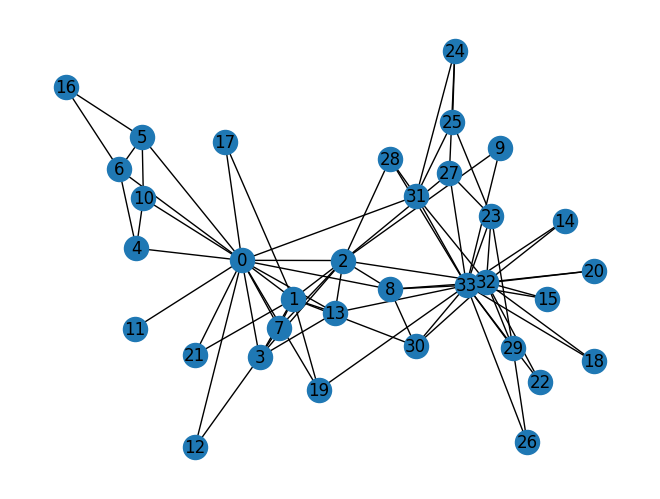

In [3]:
nx.draw(G, with_labels=True)
plt.show()


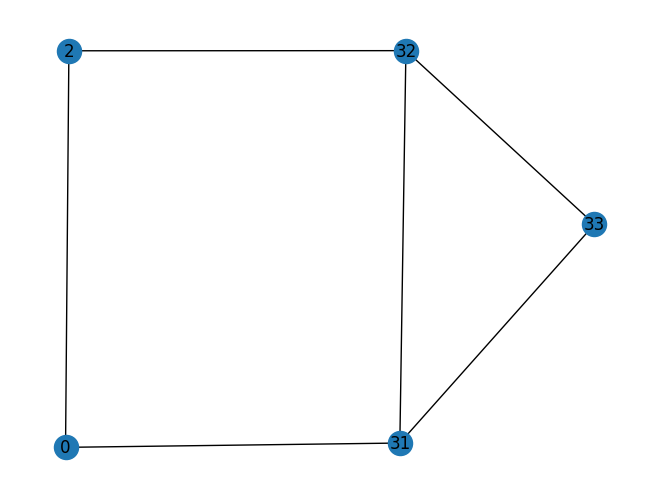

In [4]:
centrality_scores = nx.betweenness_centrality(G)
important_nodes = sorted(centrality_scores, key=centrality_scores.get, reverse=True)[:5]

important_subgraph = G.subgraph(important_nodes)
nx.draw(important_subgraph, with_labels=True)
plt.show()


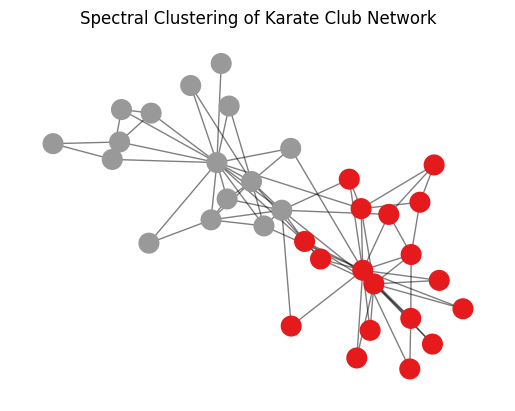

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
import numpy as np

# Step 1: Pre-processing - Construct the Laplacian Matrix
G = nx.karate_club_graph()
adjacency_matrix = nx.adjacency_matrix(G).toarray()
diagonal_matrix = np.diag(np.sum(adjacency_matrix, axis=1))
laplacian_matrix = diagonal_matrix - adjacency_matrix

# Step 2: Decomposition - Compute eigenvalues and eigenvectors of the Laplacian Matrix
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 3: Map points to a lower-dimensional representation and perform clustering
k = 2  # Number of clusters
points = eigenvectors[:, :k]
spectral_clustering = SpectralClustering(n_clusters=k, affinity='nearest_neighbors')
clusters = spectral_clustering.fit_predict(points)

# Visualize the clusters
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=clusters, cmap=plt.cm.Set1, node_size=200)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Spectral Clustering of Karate Club Network")
plt.axis('off')
plt.show()
